# Spotify Classificator

Now that we have our data, we can start testing classifiers. First, let's look at the attributes and representation of the sample.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spotify_data = pd.read_csv('SpotifyData.csv')
spotify_data = spotify_data.dropna(axis=0)

spotify_data.describe()

,duration,end Of Fade-In,start Of Fade-Out,loudness,tempo,time Signature,mode,key,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,number Of Sections,tatums Per Beats,tatums Deviation,attack Average,attack Deviation
count,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000,51988.000000
mean,250.458472,0.751528,241.253970,-8.920615,123.279943,3.899573,0.679484,5.352466,0.370510,0.508894,0.611509,0.163121,0.194105,0.059507,0.485415,10.796241,1.999983,0.021017,238.031600,491.681740
std,99.693518,1.791099,97.871223,5.055896,30.340892,0.412704,0.466680,3.498782,0.347432,0.175215,0.263098,0.311173,0.162901,0.053004,0.270065,4.062912,0.000211,0.035794,115.198804,1048.476679
min,26.600000,0.000000,26.600000,-44.809000,48.695000,1.000000,0.000000,0.000000,0.000000,0.055500,0.001510,0.000000,0.015800,0.022300,0.006900,2.000000,1.992908,0.000000,-539.876000,38.589000
25%,193.560000,0.118550,186.154380,-10.985000,99.958000,4.000000,0.000000,2.000000,0.019200,0.407000,0.406000,0.000000,0.098700,0.032900,0.272000,8.000000,2.000000,0.002000,164.864000,203.777000
50%,235.000000,0.266390,225.593470,-7.869000,121.943000,4.000000,1.000000,5.000000,0.273000,0.530000,0.637000,0.000280,0.128000,0.041700,0.485000,10.000000,2.000000,0.004000,215.835000,289.016000
75%,280.066670,0.511840,269.397910,-5.472000,143.018000,4.000000,1.000000,9.000000,0.716000,0.632000,0.849000,0.094800,0.241000,0.064100,0.711000,12.000000,2.000000,0.011000,287.235000,434.770000
max,3650.687710,56.279370,3593.003540,0.698000,217.232000,5.000000,1.000000,11.000000,0.996000,0.955000,1.000000,0.989000,0.994000,0.857000,0.988000,154.000000,2.000000,0.247000,2434.718000,28172.125000


#### Attributes breakdown
##### We have in total **20 attributes** (excluding 'Genre' label) and **51988 records**. The attributes are:
* Duration - The duration of a track in seconds.
* End of Fade-in - The second in which the Fade-In stops.
* Start of Fade-Out - The second in which the Fade-Out starts.
* Loudness - The average track loudness in dB.
* Tempo - The tempo of the a track in BPM (beats per minute).
* Time Signature - Metre ; The number of beats in a bar.
* Mode - Specifies whether a track is in major (value 1) or minor scale (value 0).
* Key - The most frequent key in a track. Values in this attribute range from 0 to 11 and represent 12 keys in an octave (e.g. 0=C, 1=C#, 2=D etc.)
* Acousticness - This attribute is the result of the audio analysis performed by the Spotify. It predicts how likely a track is acoustic in nature. 1.0 represents high confidence the track is acoustic.
* Danceability - Also a value generated by the Spotify. Describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.
* Energy - Generated by the Spotify. It represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. 
* Instrumentalness - Generated by the Spotify. Predicts whether a track contains no vocals.  The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* Liveness - Generated by the Spotify. Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* Speechiness - Generated by the Spotify. Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
* Valence - Generated by the Spotify. A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* Number of sections - Specifies how many sections a track consists of. Sections are defined by large variations in rhythm or timbre (e.g. chorus, verse, bridge, guitar solo, etc.).
* Tatums per beats - Determines how many tatums are in a beat. A tatum represents the lowest regular pulse train that a listener intuitively infers from the timing of perceived musical events (segments).
* Tatums standard deviation - Standard Deviation of the length of all the tatums (in seconds).
* Attack average - Average attack, calculated from the attack of each segment. A song is subdivided into many segments, with each one containing a roughly consitent sound throughout its duration.
* Attack standard deviation - Standard deviation of the segments attacks.


##### Let's look now at the distribution of the label.

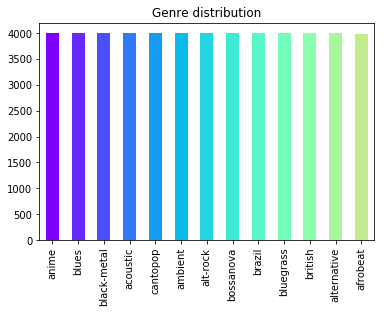

In [3]:
colors=iter(plt.cm.rainbow(np.linspace(0,1,20)))

spotify_data['Genre'].value_counts().plot(kind='bar', title='Genre distribution', color=colors)

#### Labels
##### In this case, we have **13 genres**, all with almost the same distribution (around 4000 each). 
##### Now let's encode the labels, split the data into train and test sets and standarise them.

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
spotify_data.loc[:, 'Genre'] = le.fit_transform(spotify_data.loc[:, 'Genre'])

X, Y = spotify_data.drop('Genre', axis=1).values, spotify_data.loc[:, 'Genre'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

##### Now we can get to comparing classifiers. We'll start with the decision tree and random forest and try to find the best parameters.

In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

dtc = DecisionTreeClassifier(random_state=8)
rfc = RandomForestClassifier(random_state=8, n_jobs=2)
knnc = KNeighborsClassifier(algorithm='auto')
svc = SVC(random_state=8, shrinking=True, probability=True)
abcr = AdaBoostClassifier(random_state=8, algorithm='SAMME.R')
gnb = GaussianNB()
classifiers =[dtc, rfc, knnc, svc, abcr, gnb]

##### Let's start with creating a function to compare parameters and then  we'll specify parameters to lookup in the decision tree. Of course there's a posibility the true optimum will fall outside our range, but these should give us a pretty well performing classifier. 

In [10]:
def tune_classifier(parameters_dict, clf, create_plot, rows=2, columns=2):
    # index is for keeping tack of the subplot's position on the figure matrix
    index = 1
    best_parameters = {}
    for parameter, p_range in parameters_dict.items():
        gscv = GridSearchCV(estimator = clf, param_grid = {parameter: p_range}, scoring='accuracy', cv=5, n_jobs = 2)
        gscv.fit(scaled_X_train, Y_train)

        best_parameters.update(gscv.best_params_)
        means = gscv.cv_results_['mean_test_score']
        if create_plot:
            plt.subplot(rows, columns, index)
            plt.xlabel('parameter value')
            plt.ylabel('accuracy')
            plt.plot(p_range, means)
            plt.title(parameter)
            index += 1
        else:
            print("best params: {}".format(gscv.best_params_))

    return best_parameters

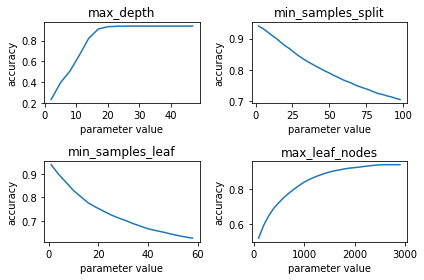

In [11]:
dt_parameters = {
    'max_depth' : list(np.arange(2,50,3)) + [None],
    "min_samples_split": np.arange(2,100,3),
    "min_samples_leaf": np.arange(1,60,3),
    "max_leaf_nodes": list(np.arange(100,3000,100)) + [None]
    }
best_parameters_dt = tune_classifier(dt_parameters, dtc, True)
dtc.set_params(**best_parameters_dt)
plt.tight_layout()
plt.show()


##### Great, now that we found our optimal parameters for DT, let's see how it'll look on other classifiers.

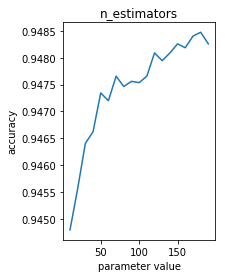

In [12]:
rf_parameters = {
    'n_estimators' : np.arange(10, 200, 10)
    }
best_parameters_rf = tune_classifier(rf_parameters, rfc, True, 1, 2)
best_parameters_rf.update(best_parameters_dt)
rfc.set_params(**best_parameters_rf)

plt.show()

In [11]:
knn_parameters = {
    'n_neighbors': np.arange(2,15,2),
    'leaf_size' : np.arange(10,150, 20), 
    'p' : np.arange(1,3,1),
    }
best_parameters_knn = tune_classifier(knn_parameters, knnc, False)
knnc.set_params(**best_parameters_knn)

best params: {'n_neighbors': 2}
best params: {'leaf_size': 30}
best params: {'p': 1}


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=1,
           weights='uniform')

In [12]:
svc_parameters = {
    'C' : [1, 100, 1000],
    'kernel' : ['rbf', 'sigmoid','linear'],
    'degree' : [1,2,3],
    'gamma' : [0.01, 0.1 ,1, 'auto']
    }
best_parameters_svc = tune_classifier(svc_parameters, svc, False)
svc.set_params(**best_parameters_svc)

best params: {'gamma': 1}
best params: {'kernel': 'rbf'}
best params: {'C': 1000}
best params: {'degree': 1}


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=8, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
abcr_parameters = {
    'base_estimator' : [None, dtc, rfc],
    'n_estimators' : np.arange(2,100,2),
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
    }
best_parameters_abcr = tune_classifier(abcr_parameters, abcr, False)
abcr.set_params(**best_parameters_abcr)

best params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=2700,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=8,
            splitter='best')}
best params: {'n_estimators': 8}
best params: {'learning_rate': 0.1}


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=2700,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=8,
            splitter='best'),
          learning_rate=0.1, n_estimators=8, random_state=8)

##### We found best parameters for each classifier, so now let's see how they compare to one another.

In [ ]:
cols=['Classifier', 'Accuracy', 'Log Loss']
results = pd.DataFrame(columns=cols)

for clf in classifiers:
    clf.fit(scaled_X_train, Y_train)
    name = clf.__class__.__name__

    train_predictions = clf.predict(scaled_X_test)
    acc = accuracy_score(Y_test, train_predictions)

    train_predictions = clf.predict_proba(scaled_X_test)
    ll = log_loss(Y_test, train_predictions)

    results_entry = pd.DataFrame([[name, acc*100, ll]], columns=cols)
    results = results.append(results_entry)

##### Now we can graph the performance of all the models. Below is the Accuracy measure of each classifier and Log Loss.

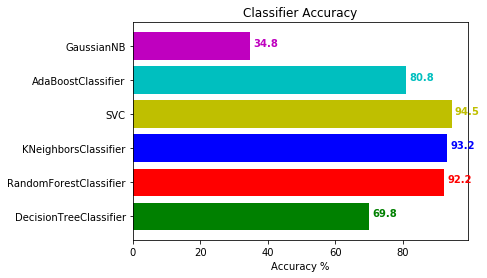

In [28]:
color_table = ['g', 'r','b','y','c','m']
plt.barh(y = results.loc[:, 'Classifier'], width=results.loc[:, 'Accuracy'], color = ['g', 'r','b','y','c','m'])
for i, v in enumerate(results.loc[:, 'Accuracy']):
    plt.text(v+1, i , str(round(v,1)), color=color_table[i], fontweight='bold')
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

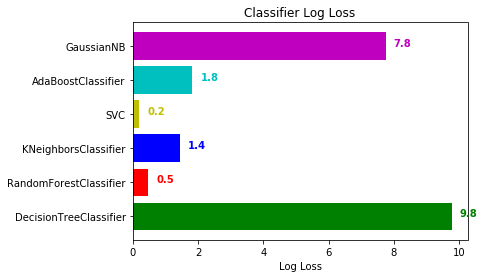

In [35]:
plt.barh(y = results.loc[:, 'Classifier'], width=results.loc[:, 'Log Loss'], color = ['g', 'r','b','y','c','m'])
for i, v in enumerate(results.loc[:, 'Log Loss']):
    plt.text(v+0.25,i , str(round(v,1)), color=color_table[i], fontweight='bold')
plt.xlabel('Accuracy %')
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

##### We can see the SVM with RBF kernel achieved both the highest accuracy score and lowest Log Loss.